<a href="https://colab.research.google.com/github/UsmanHaziq/Case-II-NIH/blob/main/CNN-TIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

# Load the training and validation datasets
train_set = datagen.flow_from_directory(
    '/content/drive/MyDrive/lungs new updated/Train',
    target_size=(224, 224),
    batch_size=32
)

val_set = datagen.flow_from_directory(
    '/content/drive/MyDrive/lungs new updated/val',
    target_size=(224, 224),
    batch_size=32
)


Found 2100 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [3]:
test_set = datagen.flow_from_directory(
    '/content/drive/MyDrive/lungs new updated/Test',
    target_size=(224, 224),
    batch_size=32
)

Found 450 images belonging to 3 classes.


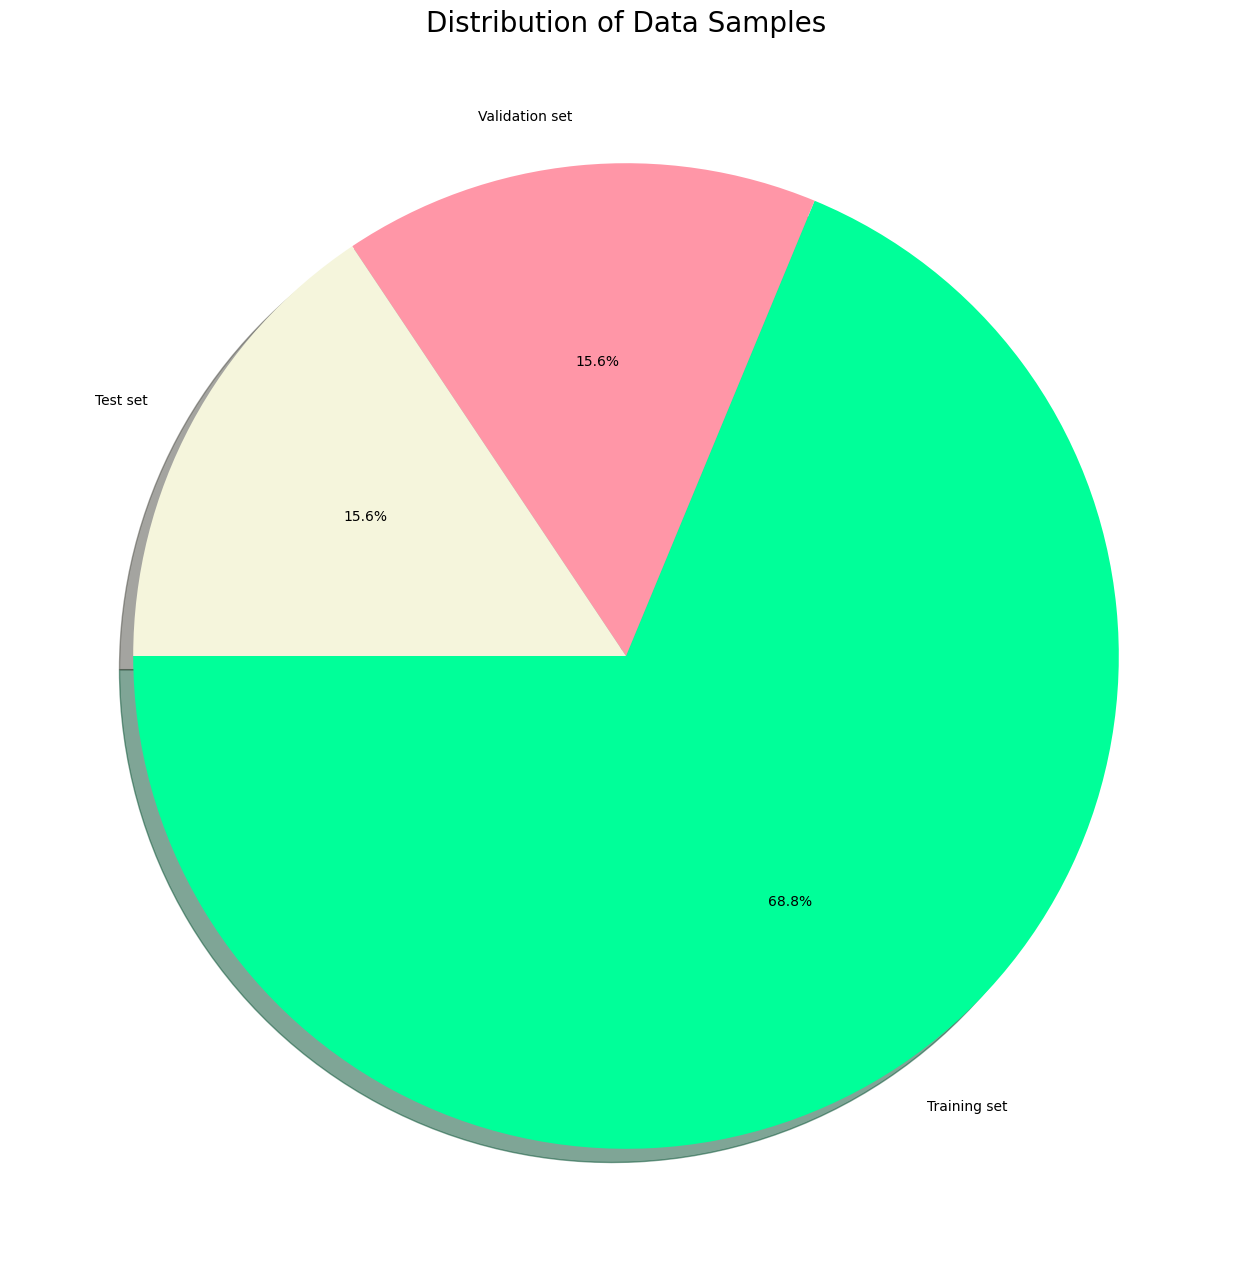

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define class names
class_names = ['Training set', 'Validation set', 'Test set']

# Get the number of samples in each set
labels_count = [len(train_set), len(val_set), len(test_set)]

# Create the pie chart
plt.figure(figsize=(16, 16))
plt.pie(labels_count, labels=class_names, startangle=180,
        autopct='%1.1f%%', colors=['#00ff99', '#FF96A7',"beige"], shadow=True)
plt.title('Distribution of Data Samples', fontsize=20)
plt.show()

In [5]:
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']
print(class_names)


['adenocarcinoma', 'benign', 'squamous_carcinoma']


In [6]:
for image_batch, label_batch in train_set:
    print(image_batch.shape)
    break

(32, 224, 224, 3)


In [7]:
from tensorflow.keras.applications import InceptionV3
IMAGE_SIZE = [224, 224]

In [8]:
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(224, 224, 3),strides=1))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

import tensorflow as tf
from tensorflow.keras import losses, optimizers

# Compile the model
model.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adadelta(),
                  metrics=['accuracy'])

import time

# Start timer
start_time = time.time()

# Train the model
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=60,
    steps_per_epoch=len(train_set),
    validation_steps=len(val_set)
)

# Stop timer
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Elapsed time for training: {elapsed_time:.2f} seconds")

Epoch 1/60
66/66 [==============================] - 1359s 20s/step - loss: 0.9132 - accuracy: 0.5619 - val_loss: 0.7127 - val_accuracy: 0.6489
Epoch 2/60
66/66 [==============================] - 698s 11s/step - loss: 0.6941 - accuracy: 0.6643 - val_loss: 0.6032 - val_accuracy: 0.6822
Epoch 3/60
66/66 [==============================] - 696s 11s/step - loss: 0.6275 - accuracy: 0.6748 - val_loss: 0.5471 - val_accuracy: 0.7733
Epoch 4/60
66/66 [==============================] - 707s 11s/step - loss: 0.5793 - accuracy: 0.7029 - val_loss: 0.5195 - val_accuracy: 0.7600
Epoch 5/60
66/66 [==============================] - 697s 11s/step - loss: 0.5605 - accuracy: 0.7033 - val_loss: 0.5391 - val_accuracy: 0.6689
Epoch 6/60
66/66 [==============================] - 694s 11s/step - loss: 0.5485 - accuracy: 0.7129 - val_loss: 0.5184 - val_accuracy: 0.7133
Epoch 7/60
66/66 [==============================] - 703s 11s/step - loss: 0.5292 - accuracy: 0.7286 - val_loss: 0.4846 - val_accuracy: 0.7578
Epoch

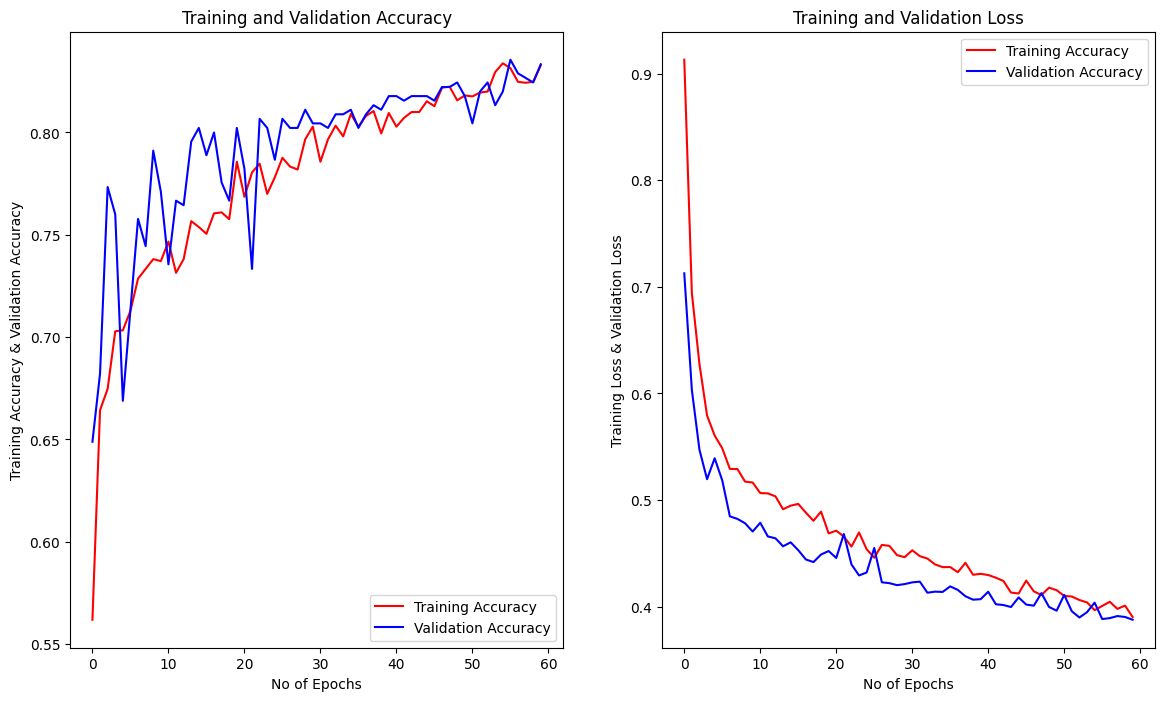

In [9]:
# Extract the metrics from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the results
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy',color='red')
plt.plot(range(len(acc)), val_acc, label='Validation Accuracy',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Accuracy',color='red')
plt.plot(range(len(val_loss)), val_loss, label='Validation Accuracy',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
loss,accuracy=model.evaluate(train_set)
accuracy*100

66/66 [==============================] - 150s 2s/step - loss: 0.3595 - accuracy: 0.8500


85.00000238418579

In [5]:
val_loss,val_accuracy=model.evaluate(val_set)
val_accuracy*100

NameError: name 'model' is not defined